In [2]:
# General use
import numpy as np
import matplotlib.pyplot as plt
# For the scan conversion part
import math
from scipy import signal
from scipy.interpolate import griddata
from scipy.signal import decimate, convolve 

from pathlib import Path
import glob

# `Meta`

* Title: Creating npusz
* Description: Detailed process to create the npusz files.
* Tags: utilities

# Experiment - ProbeX

In [110]:
rf_raw = np.load("data/probeX/tableDataRaw.npz")["tableDataRaw"]
t = np.load("data/probeX/t.npz")["t"]
Val = np.average(rf_raw) 
Offset = 400
MinTable = 10*np.min(rf_raw)
Zeroes = np.zeros((1000,Offset))+Val
BigTable = []
BigTable = np.append(Zeroes, rf_raw, axis=1)
IndexLine = 110 
tableData = BigTable[:,:3000+Offset] 

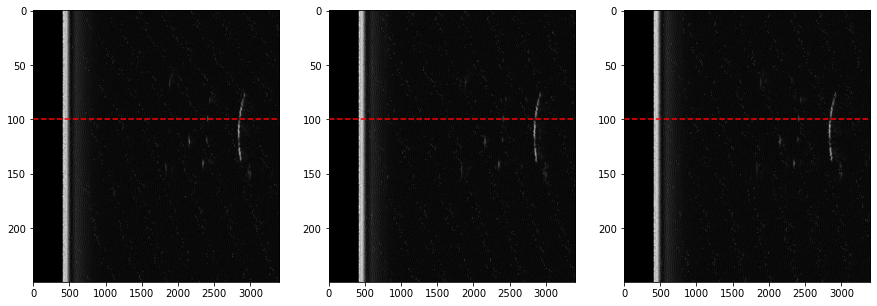

In [111]:
ListOfPoints= [104, 418, 741] # this was eye-balled looking the image above

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

TmpImg = (abs(tableData[ListOfPoints[0]-100:ListOfPoints[0]+150]))**(1.1)
ax1.imshow(TmpImg,cmap=plt.get_cmap('gray'), aspect='auto')
ax1.axhline(100, color='r', linestyle='--')
TmpImg = (abs(tableData[ListOfPoints[1]-100:ListOfPoints[1]+150]))**(1.1)
ax2.imshow(TmpImg,cmap=plt.get_cmap('gray'), aspect='auto')
ax2.axhline(100, color='r', linestyle='--')
TmpImg = (abs(tableData[ListOfPoints[2]-100:ListOfPoints[2]+150]))**(1.1)
ax3.imshow(TmpImg,cmap=plt.get_cmap('gray'), aspect='auto')
ax3.axhline(100, color='r', linestyle='--')

In [112]:
imgs = []
dictData = {}
for k in range(3):
    imgs.append(tableData[ListOfPoints[k]-100:ListOfPoints[k]+150])
dictData["f"] = 10.67
dictData["src"] = "img"
dictData["src_desc"] = ["Image from wirephantom"]
dictData["Desc"] = "Image from a wirephantom using a ATL3 probe with older modules."
dictData["img"] = imgs
dictData["NbImg"] = len(dictData["img"])
dictData["sensor"] = "retroATL3"
dictData["meta"] = {}
dictData["meta"]["url"] = ["https://github.com/kelu124/us_rf_processing/blob/main/00.A.RF_Processing.ipynb","https://github.com/kelu124/echomods/blob/master/elmo/data/20170714-TwoADCs-Probe.ipynb"]
dictData["meta"]["setup"] = ["https://raw.githubusercontent.com/kelu124/echomods/master/elmo/images/20170717_210209.jpg"]
dictData["meta"]["harware"] = "Modules"
dictData["meta"]["target"] = "wirephantom"

In [113]:
np.savez("data/probeX.npusz",img=dictData)

# NDT stair

In [136]:
signal_20mm = np.load("data/NDT_stairs/20190404a-3.npz")["data"]
print(np.shape(signal_20mm))
signal_10mm = np.load("data/NDT_stairs/20190404a-5.npz")["data"]
print(np.shape(signal_10mm))
signal_15mm = np.load("data/NDT_stairs/20190404a-4.npz")["data"]
print(np.shape(signal_15mm))

(10, 3648)
(10, 3648)
(10, 3648)


In [115]:
imgs = []
dictData = {}
dictData["img"] = [signal_10mm,signal_15mm,signal_20mm]
dictData["NbImg"] = len(dictData["img"])
dictData["src_desc"] = ["10mm steel","15mm steel","20mm steel"]
dictData["f"] = 64.0
dictData["src"] = "img"
dictData["sensor"] = "dual5MHzNDT"
dictData["Desc"] = "Image steel calibration blocks (10-20mm) using a dual element transducer."
dictData["meta"] = {}
dictData["meta"]["url"] = ["https://github.com/kelu124/us_rf_processing/blob/main/01.NDT_Processing.ipynb"]
dictData["meta"]["setup"] = ["https://camo.githubusercontent.com/1ba5c6c0c6b8e254c7274634df5c6f555e58dc3f/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6b656c753132342f6563686f6d6f64732f6d61737465722f6d617474792f3230313930333239612f70686f746f732f505f32303139303332395f3231343135392e6a7067"]
dictData["meta"]["harware"] = "un0rick"
dictData["meta"]["target"] = "wirephantom"
np.savez("data/ndt.npusz",img=dictData)

# Bard 3.5MHz probe

### 160 lines / img

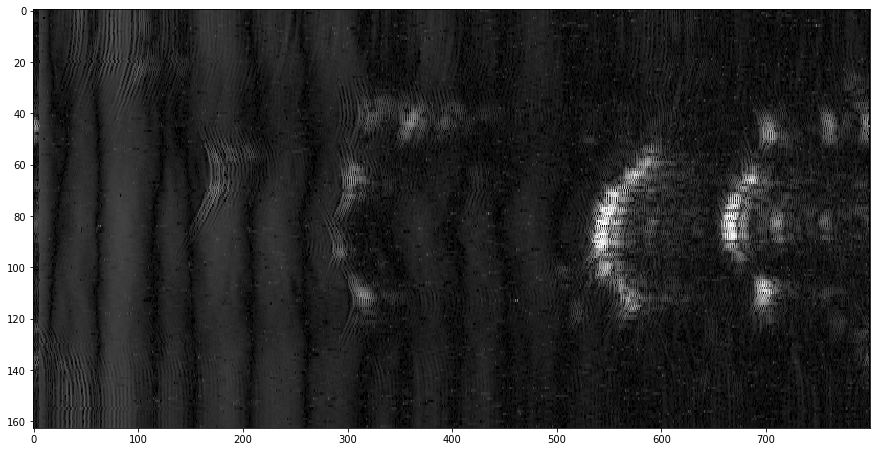

In [4]:
signal = np.load("data/bard/raw.npz")["img"]
img_size =np.shape(signal[1])
plt.figure(figsize=(15, 15))
plt.imshow(np.sqrt(np.abs(signal[1])), cmap='gray', aspect=0.5*(img_size[1]/img_size[0]), interpolation='nearest')


In [5]:
imgs = []
dictData = {}
dictData["img"] = signal
dictData["NbImg"] = len(dictData["img"])
dictData["src_desc"] = ["Bard test"]
dictData["f"] = 64.0/5.0
dictData["prf_us"] = 200
dictData["src"] = "img"
dictData["Desc"] = "Image from a wirephantom using a bard 3.5 probe with un0rick. 160 lines/image."
dictData["sensor"] = "brd35"
dictData["meta"] = {}
dictData["meta"]["url"] = ["https://github.com/kelu124/echomods/blob/master/matty/20200608a/20200608a.ipynb"]
dictData["meta"]["experiment"] = "20200608a"
dictData["meta"]["harware"] = "un0rick"
dictData["meta"]["target"] = "wirephantom"
np.savez("data/brd35.npusz",img=dictData)

### 66 lines / img

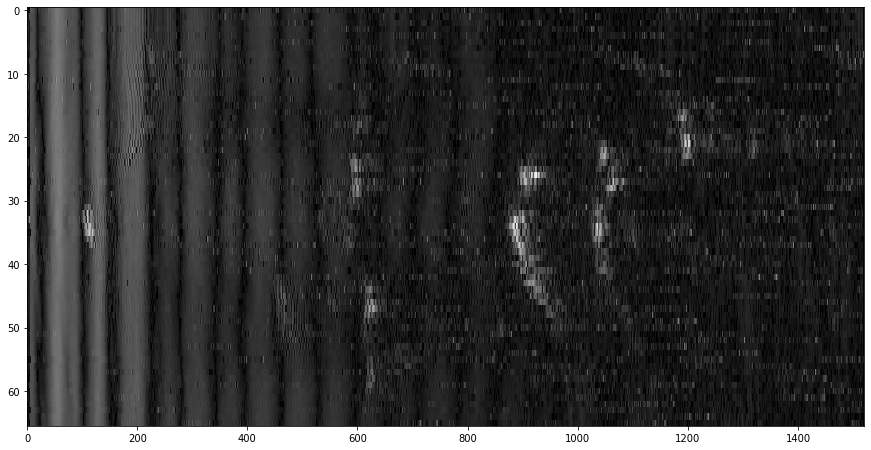

In [22]:
signal = np.load("data/bard/raw2.npz")["img"]
img_size =np.shape(signal[1])
plt.figure(figsize=(15, 15))
plt.imshow(np.sqrt(np.abs(signal[1])), cmap='gray', aspect=0.5*(img_size[1]/img_size[0]), interpolation='nearest')


In [23]:
imgs = []
dictData = {}
dictData["img"] = signal
dictData["NbImg"] = len(dictData["img"])
dictData["src_desc"] = ["Bard test v2"]
dictData["f"] = 64.0/4.0
dictData["prf_us"] = 500
dictData["src"] = "img"
dictData["Desc"] = "Image from a wirephantom using a bard 3.5 probe with un0rick. 66 lines/image."
dictData["sensor"] = "brd35"
dictData["meta"] = {}
dictData["meta"]["url"] = ["https://github.com/kelu124/echomods/blob/master/matty/20200608a/20200608a-file10.ipynb"]
dictData["meta"]["experiment"] = "20200608a"
dictData["meta"]["harware"] = "un0rick"
dictData["meta"]["target"] = "wirephantom"
np.savez("data/brd35_66lpi.npusz",img=dictData)

# Experiment : 20180831c

(179, 2688)


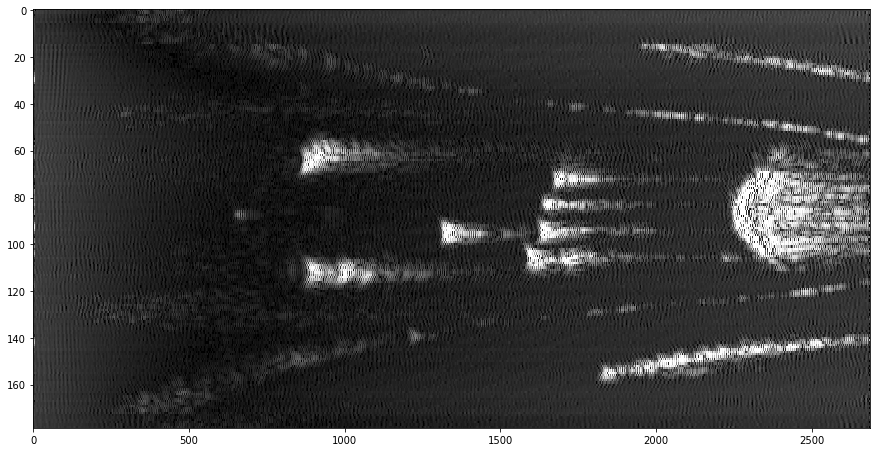

In [8]:
signal = np.load("data/20180831c/31c.npz")["img"]
img_size =np.shape(signal[0])
print(img_size)
plt.figure(figsize=(15, 15))
plt.imshow(np.sqrt(np.abs(signal[0])), cmap='gray', aspect=0.5*(img_size[1]/img_size[0]), interpolation='nearest')

In [9]:
imgs = []
dictData = {}
dictData["img"] = signal
dictData["NbImg"] = len(dictData["img"])
dictData["src_desc"] = ["Image from wirephantom"]
dictData["f"] = 64.0/2.0 
dictData["src"] = "img"
dictData["sensor"] = "retroATL3"
dictData["Desc"] = "Image from a wirephantom using an ATL3 probe with un0rick."
dictData["meta"] = {}
dictData["meta"]["url"] = ["https://github.com/kelu124/echomods/blob/master/matty/20180831c/20180831c-Client.ipynb"]
dictData["meta"]["experiment"] = "20180831c"
dictData["meta"]["harware"] = "un0rick"
dictData["meta"]["target"] = "wirephantom"
np.savez("data/atl3_31c.npusz",img=dictData)

# 20181104a - hp2121

(54, 3200)


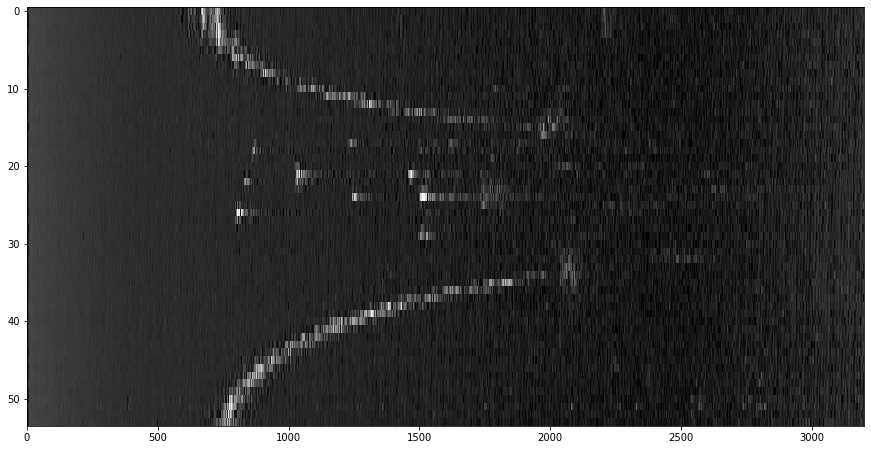

In [10]:
signal = np.load("data/20181104a/frames.npz")["img"]
img_size =np.shape(signal[1])
print(img_size)
plt.figure(figsize=(15, 15))
plt.imshow(np.sqrt(np.abs(signal[0])), cmap='gray', aspect=0.5*(img_size[1]/img_size[0]), interpolation='nearest')

In [11]:
imgs = []
dictData = {}
dictData["img"] = signal
dictData["NbImg"] = len(dictData["img"])
dictData["src_desc"] = ["Image from wirephantom bis"]
dictData["f"] = 64.0/3.0 
dictData["src"] = "img"
dictData["sensor"] = "hp2121"
dictData["Desc"] = "Image from a wirephantom bis using an hp2121 probe with un0rick."
dictData["meta"] = {}
dictData["meta"]["url"] = ["https://github.com/kelu124/echomods/blob/master/include/experiments/auto/20181104a.md"]
dictData["meta"]["experiment"] = "20181104a"
dictData["meta"]["harware"] = "un0rick"
dictData["meta"]["target"] = "wirephantom bis"
np.savez("data/hp2121.npusz",img=dictData)

# Acquisitions from kretzaw145ba

(99, 1920)


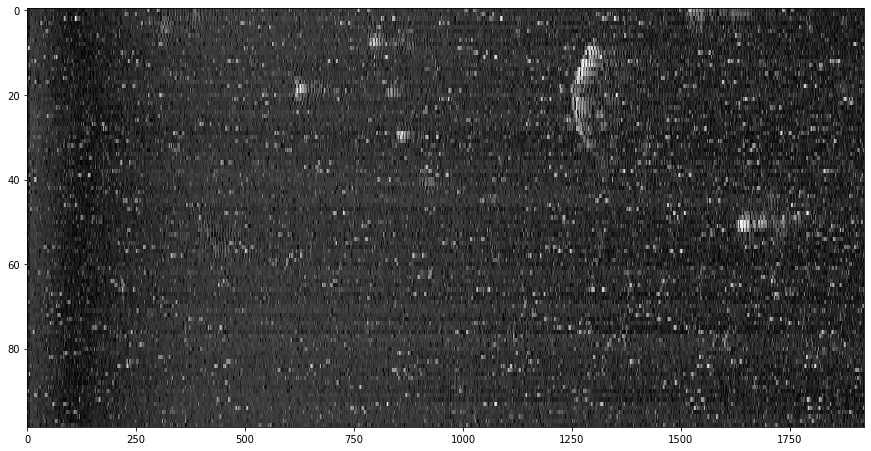

In [12]:
signal = np.load("data/20180901a/frames.npz")["img"]
img_size =np.shape(signal[1])
print(img_size)
plt.figure(figsize=(15, 15))
plt.imshow(np.sqrt(np.abs(signal[0])), cmap='gray', aspect=0.5*(img_size[1]/img_size[0]), interpolation='nearest')

In [13]:
imgs = []
dictData = {}
dictData["img"] = signal
dictData["NbImg"] = len(dictData["img"])
dictData["src_desc"] = ["Image from wirephantom bis"]
dictData["f"] = 64.0/3.0 
dictData["src"] = "img"
dictData["sensor"] = "kretzaw145ba"
dictData["Desc"] = "Image from a wirephan bis using an kretzaw145ba probe with un0rick."
dictData["meta"] = {}
dictData["meta"]["url"] = ["https://github.com/kelu124/echomods/blob/master/include/experiments/auto/20180901a.md"]
dictData["meta"]["experiment"] = "20180901a"
dictData["meta"]["harware"] = "un0rick"
dictData["meta"]["target"] = "wirephantom"
np.savez("data/kretzaw145ba.npusz",img=dictData)

# Make code

data/hp2121.npusz.npz Image from a wirephantom bis using an hp2121 probe with un0rick.
(54, 3200)
data/kretzaw145ba.npusz.npz Image from a wirephan bis using an kretzaw145ba probe with un0rick.
(99, 1920)
data/ndt.npusz.npz Image steel calibration blocks (10-20mm) using a dual element transducer.
(10, 3648)
data/probeX.npusz.npz Image from a wirephantom using a ATL3 probe with older modules.
(250, 3400)
data/brd35_66lpi.npusz.npz Image from a wirephantom using a bard 3.5 probe with un0rick. 66 lines/image.
(66, 1520)
data/atl3_31c.npusz.npz Image from a wirephantom using an ATL3 probe with un0rick.
(179, 2688)
data/brd35.npusz.npz Image from a wirephantom using a bard 3.5 probe with un0rick. 160 lines/image.
(163, 800)


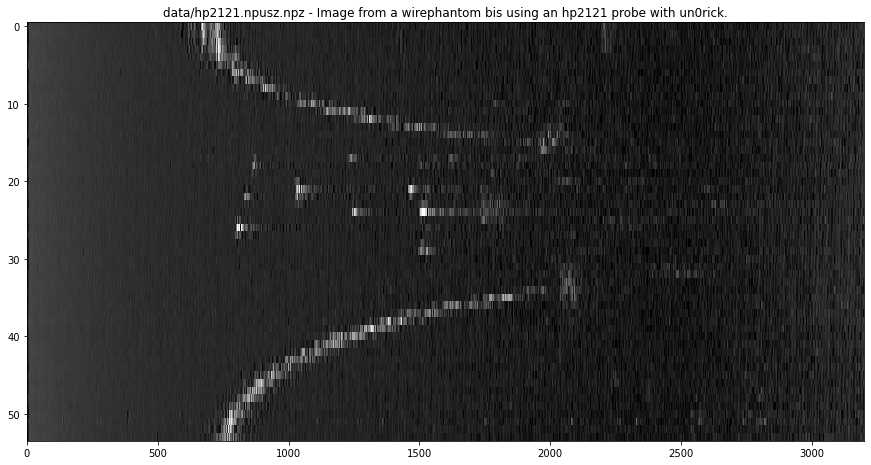

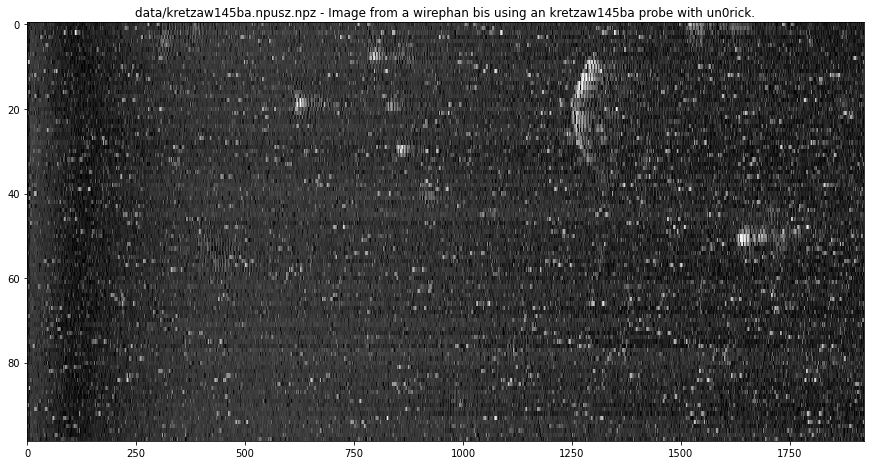

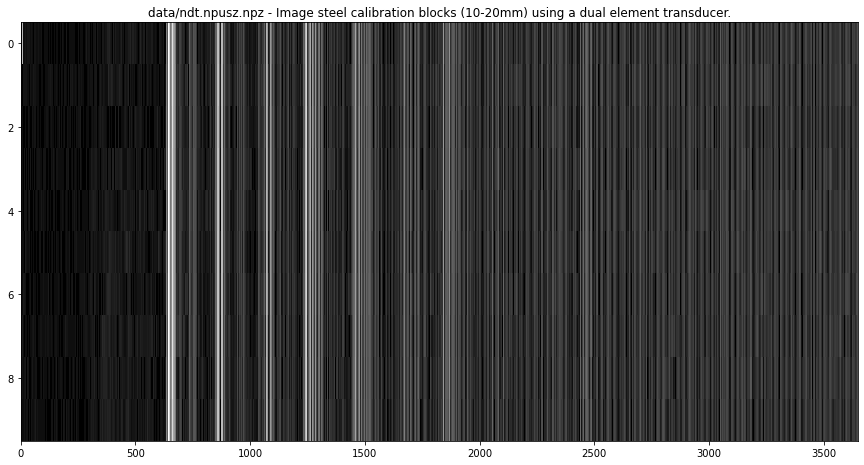

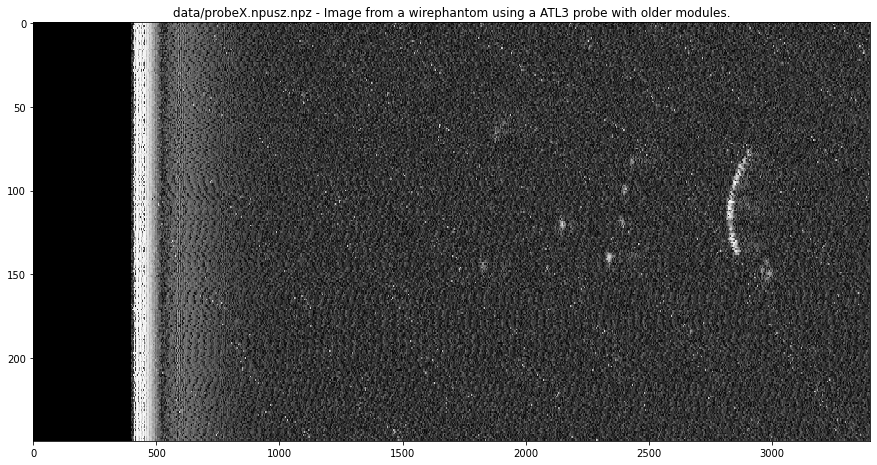

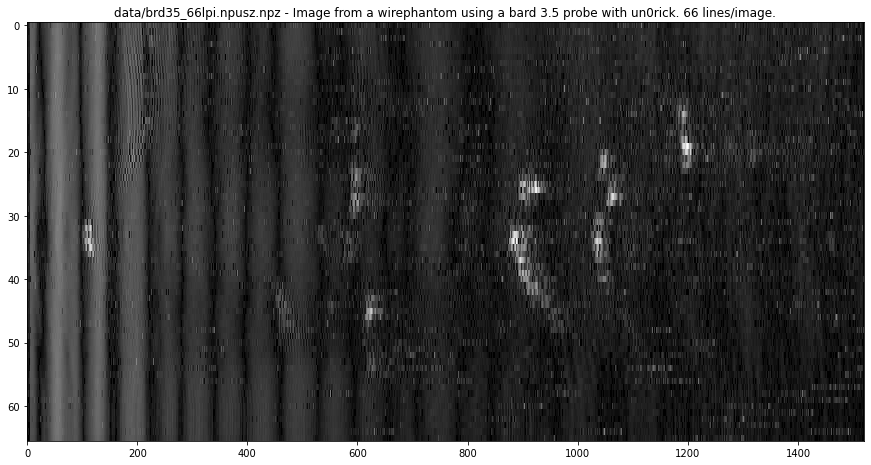

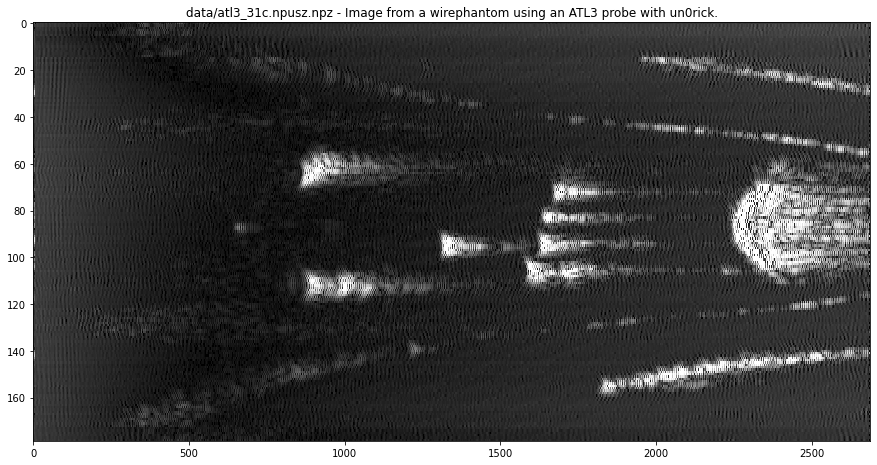

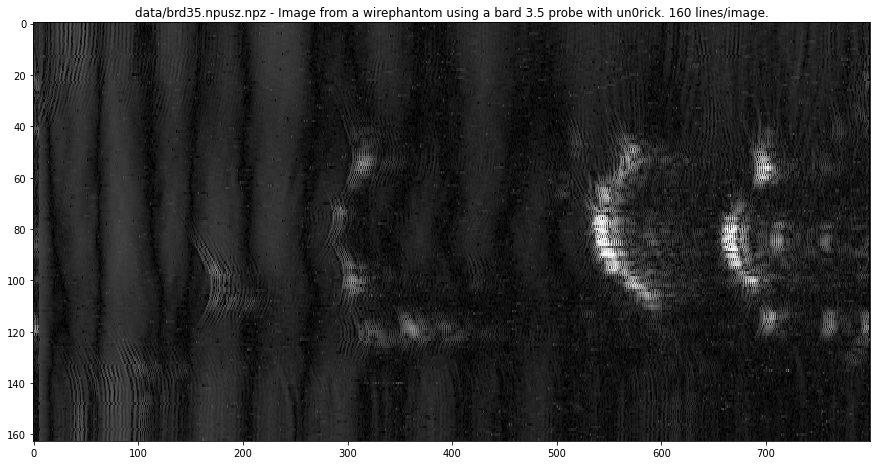

In [19]:
DESC = "\n# List of datasets \n"

DESC += "Here are stored ultrasound rf signals, mostly in npz to facilitate loading information. Accompanying images may contain metadata about the data acquisition.\n"

for file_path in Path('./').glob('**/*.npusz.npz'):
    f  = np.load(file_path,allow_pickle=True)
    print(file_path,f["img"].item()["Desc"])
    FirstImg = f["img"].item()["img"][0]
    img_size =np.shape(FirstImg)
    print(img_size)
    plt.figure(figsize=(15, 8))
    plt.imshow(np.sqrt(np.abs(FirstImg)), cmap='gray', aspect=0.5*(img_size[1]/img_size[0]), interpolation='nearest')
    plt.title(str(file_path)+" - "+f["img"].item()["Desc"])
    plt.savefig("images/"+str(file_path).split("/")[-1].split(".")[0]+".jpg")
    
    DESC += "## "+str(file_path).split("/")[-1].split(".")[0]+"\n\n"
    DESC += "#### "+f["img"].item()["Desc"] + ". Probe: "+f["img"].item()["sensor"]+". Fsampling: "+str(int(f["img"].item()["f"]))+"MHz.\n\n"
    DESC += "[Link to data]("+str(file_path)+")\n\n"
    DESC += "![](images/"+str(file_path).split("/")[-1].split(".")[0]+".jpg)\n\n"
    

In [20]:

DESC2 = "\n# Notebooks \n"
FILES = []
for file_path in Path('./').glob('./*.ipynb'):
    if "zz." not in str(file_path):
        FILES.append(str(file_path))
FILES.sort()
FILES
for f in FILES:
    p = open(f, "r")
    txt = p.read()
    if "# `Meta`" in txt:
        data = txt.split("# `Meta`")[1].split("# Experiment")[0].replace("\\n","") 
        Title = data.split("* Title:")[1].split('"')[0].strip()
        Desc = data.split("* Description:")[1].split('"')[0].strip()
        Tags = data.split("* Tags:")[1].split('"')[0].strip().split(",")
        Tags = [x.strip() for x in Tags]
        print(Title,Desc,Tags)
        DESC2 += "\n### "+str(Title)+"\n\n"
        DESC2 += "* Notebook: ["+str(f)+"]("+str(f)+")\n"
        DESC2 += "* What? "+str(Desc)+"\n"
        if len(Tags):
            DESC2 += "* Tags: "+", ".join(Tags)+"\n\n"

Introduction to RF signal processing Getting raw data and pushing a scan conversion. ['scanconversion', 'filtering']
NDT experiments NDT experiments ['ndt']
Introduction to scan conversion Introduction to scan conversion. ['scanconversion']
Compression of RF signals Exploring data compression, to assess feasibility of processing methods. ['alaw', 'compression']


In [21]:
file1 = open("README.md","w")#write mode
file1.write(DESC2 + "\n"+DESC )
file1.close()

In [18]:
print(DESC)


# List of datasets 
Here are stored ultrasound rf signals, mostly in npz to facilitate loading information. Accompanying images may contain metadata about the data acquisition.
## hp2121

#### Image from a wirephantom bis using an hp2121 probe with un0rick.. Probe: hp2121. Freq: 21MHz.

[Link to data](data/hp2121.npusz.npz)

![](images/hp2121.jpg)

## kretzaw145ba

#### Image from a wirephan bis using an kretzaw145ba probe with un0rick.. Probe: kretzaw145ba. Freq: 21MHz.

[Link to data](data/kretzaw145ba.npusz.npz)

![](images/kretzaw145ba.jpg)

## ndt

#### Image steel calibration blocks (10-20mm) using a dual element transducer.. Probe: dual5MHzNDT. Freq: 64MHz.

[Link to data](data/ndt.npusz.npz)

![](images/ndt.jpg)

## probeX

#### Image from a wirephantom using a ATL3 probe with older modules.. Probe: retroATL3. Freq: 10MHz.

[Link to data](data/probeX.npusz.npz)

![](images/probeX.jpg)

## brd35_66lpi

#### Image from a wirephantom using a bard 3.5 probe with un0rick. 66 lines/